<a href="https://colab.research.google.com/github/DariiaKhoroshchuk/deep_learning_labs/blob/master/Lab4_Dariia_Khoroshchuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip -u "/content/drive/MyDrive/Colab Notebooks/Lab4/fashion-mnist_train.csv.zip" -d "/content/drive/MyDrive/AIS/DL/2022-23/practice/Lab4/reports/Khoroshchuk-12/fashion-mnist_train.csv"

Archive:  /content/drive/MyDrive/Colab Notebooks/Lab4/fashion-mnist_train.csv.zip
  inflating: /content/drive/MyDrive/AIS/DL/2022-23/practice/Lab4/reports/Khoroshchuk-12/fashion-mnist_train.csv/fashion-mnist_train.csv  


In [ ]:
## load the libraries
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

In [ ]:
### read dataset
train = pd.read_csv("/content/drive/MyDrive/AIS/DL/2022-23/practice/Lab4/reports/Khoroshchuk-12/fashion-mnist_train.csv/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values
## normalize and reshape the predictors
train_x = train_x / 255
## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)
## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

**Task 1**

In [ ]:
## input layer
input_layer = Input(shape=(784,))
## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)
## latent view
latent_view = Dense(10, activation='sigmoid')(encode_layer3)
## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)
## output layer
output_layer = Dense(784)(decode_layer3)
model = Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1500)              1177500   
                                                                 
 dense_1 (Dense)             (None, 1000)              1501000   
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
 dense_4 (Dense)             (None, 500)               5500      
                                                                 
 dense_5 (Dense)             (None, 1000)              501000

In [ ]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 39s 2s/step - loss: 0.0943 - val_loss: 0.0685
Epoch 2/20
24/24 [==============================] - 35s 1s/step - loss: 0.0635 - val_loss: 0.0565
Epoch 3/20
24/24 [==============================] - 34s 1s/step - loss: 0.0511 - val_loss: 0.0441
Epoch 4/20
24/24 [==============================] - 34s 1s/step - loss: 0.0415 - val_loss: 0.0388
Epoch 5/20
24/24 [==============================] - 34s 1s/step - loss: 0.0373 - val_loss: 0.0363
Epoch 6/20
24/24 [==============================] - 37s 2s/step - loss: 0.0347 - val_loss: 0.0334
Epoch 7/20
24/24 [==============================] - 34s 1s/step - loss: 0.0315 - val_loss: 0.0306
Epoch 8/20
24/24 [==============================] - 34s 1s/step - loss: 0.0281 - val_loss: 0.0266
Epoch 9/20
24/24 [==============================] - 35s 1s/step - loss: 0.0259 - val_loss: 0.0249
Epoch 10/20
24/24 [==============================] - 34s 1s/step - loss: 0.0246 - val_loss: 0.0241
Epoch 11/20
24/24 [

In [ ]:
preds = model.predict(val_x)

375/375 [==============================] - 7s 19ms/step


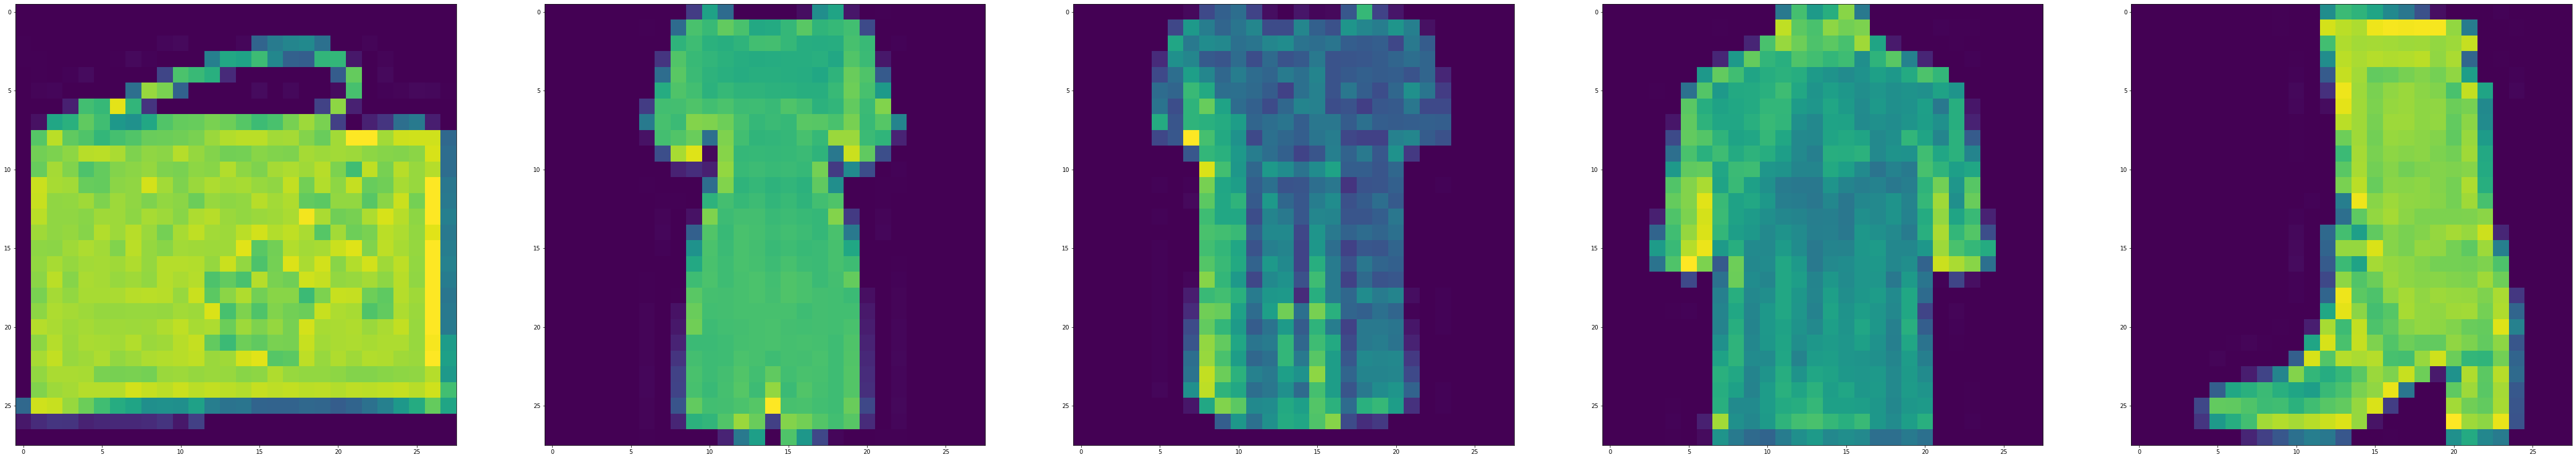

In [ ]:
from PIL import Image
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
  ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

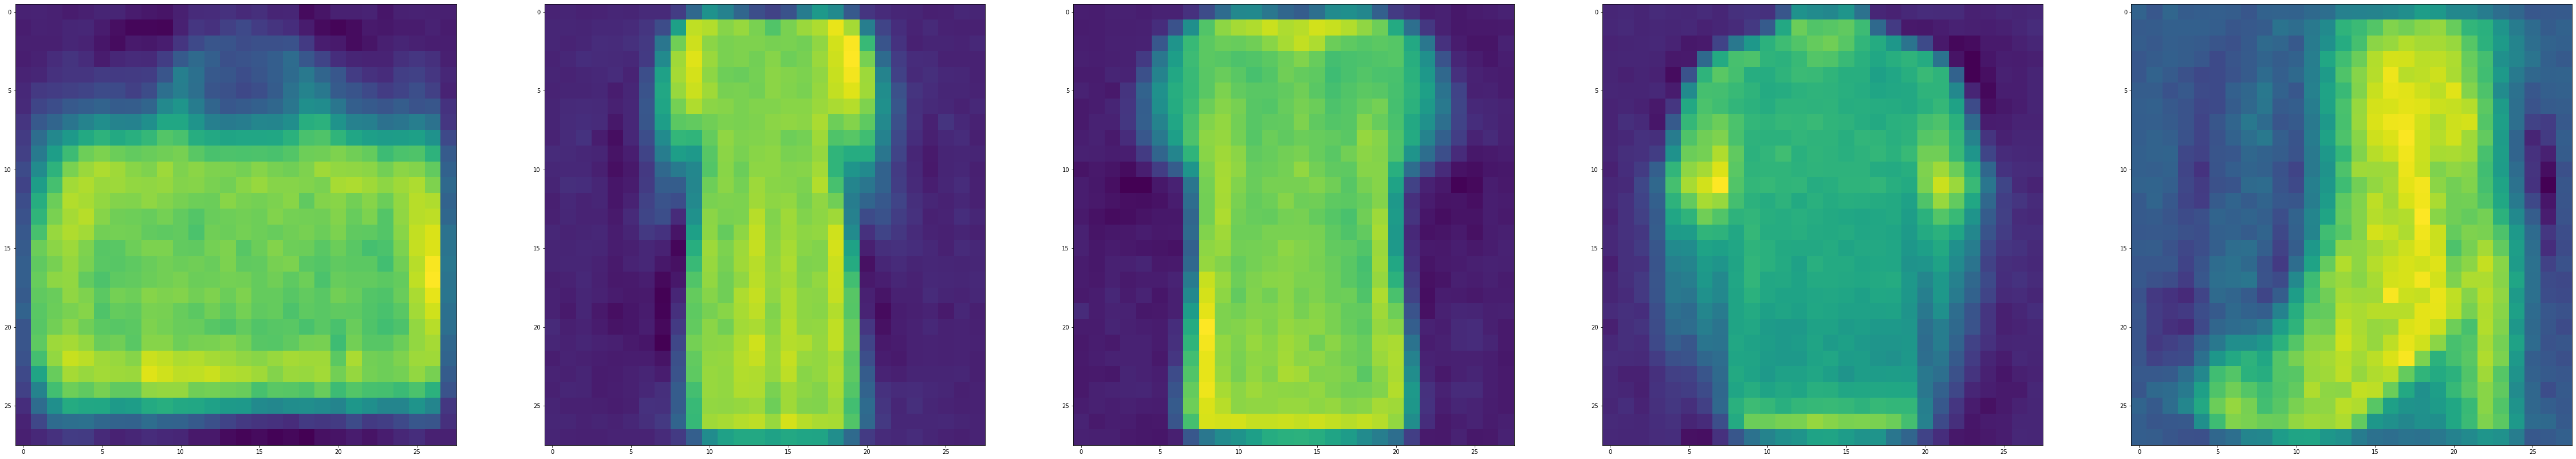

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
  ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

**Очищення шумів**

In [ ]:
## recreate the train_x array and val_x array
train_x = train[list(train.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)
## normalize and reshape
train_x = train_x/255
val_x = val_x/255

In [ ]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

In [ ]:
# Lets add sample noise - Salt and Pepper
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])
train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

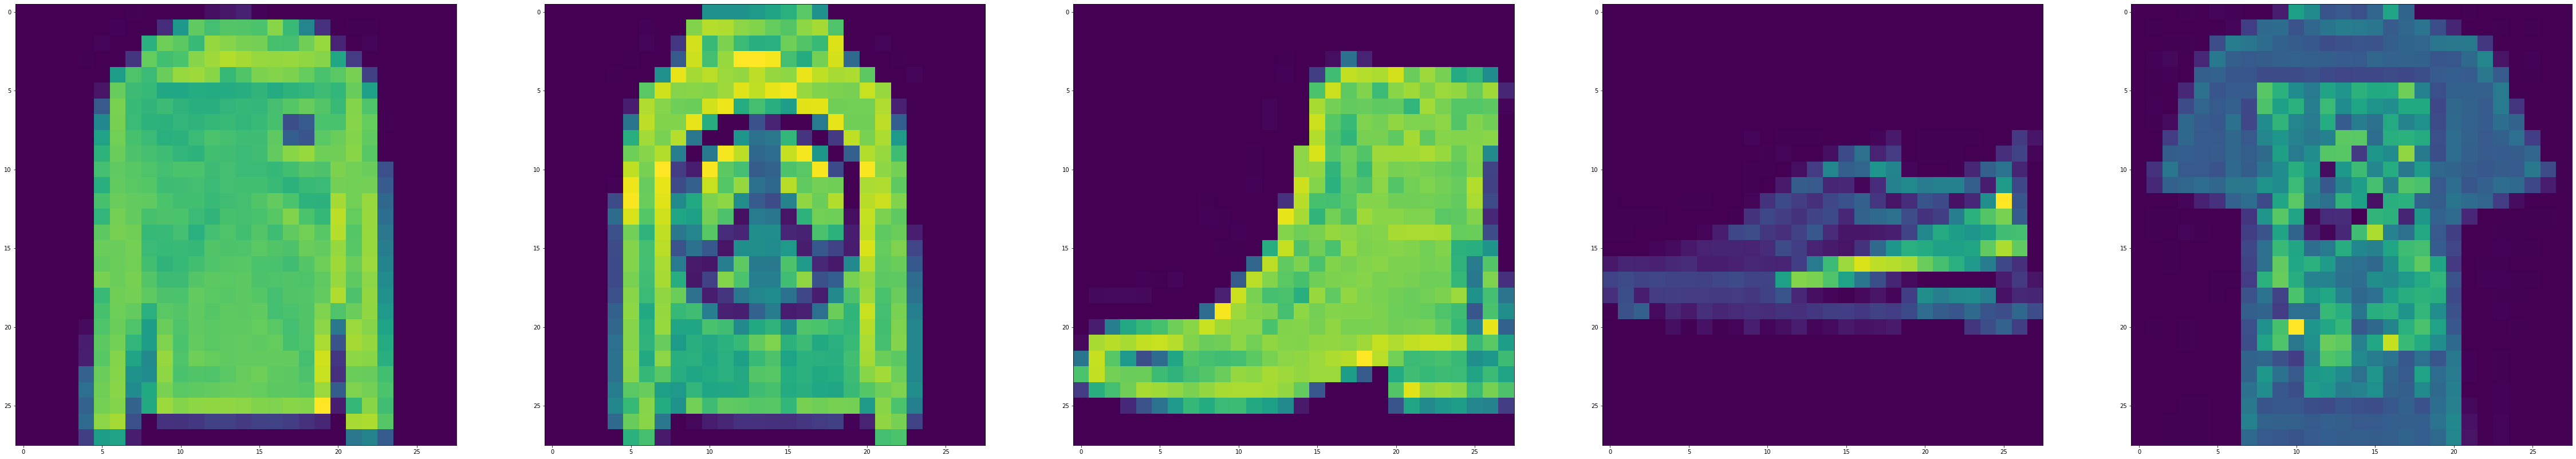

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
  ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

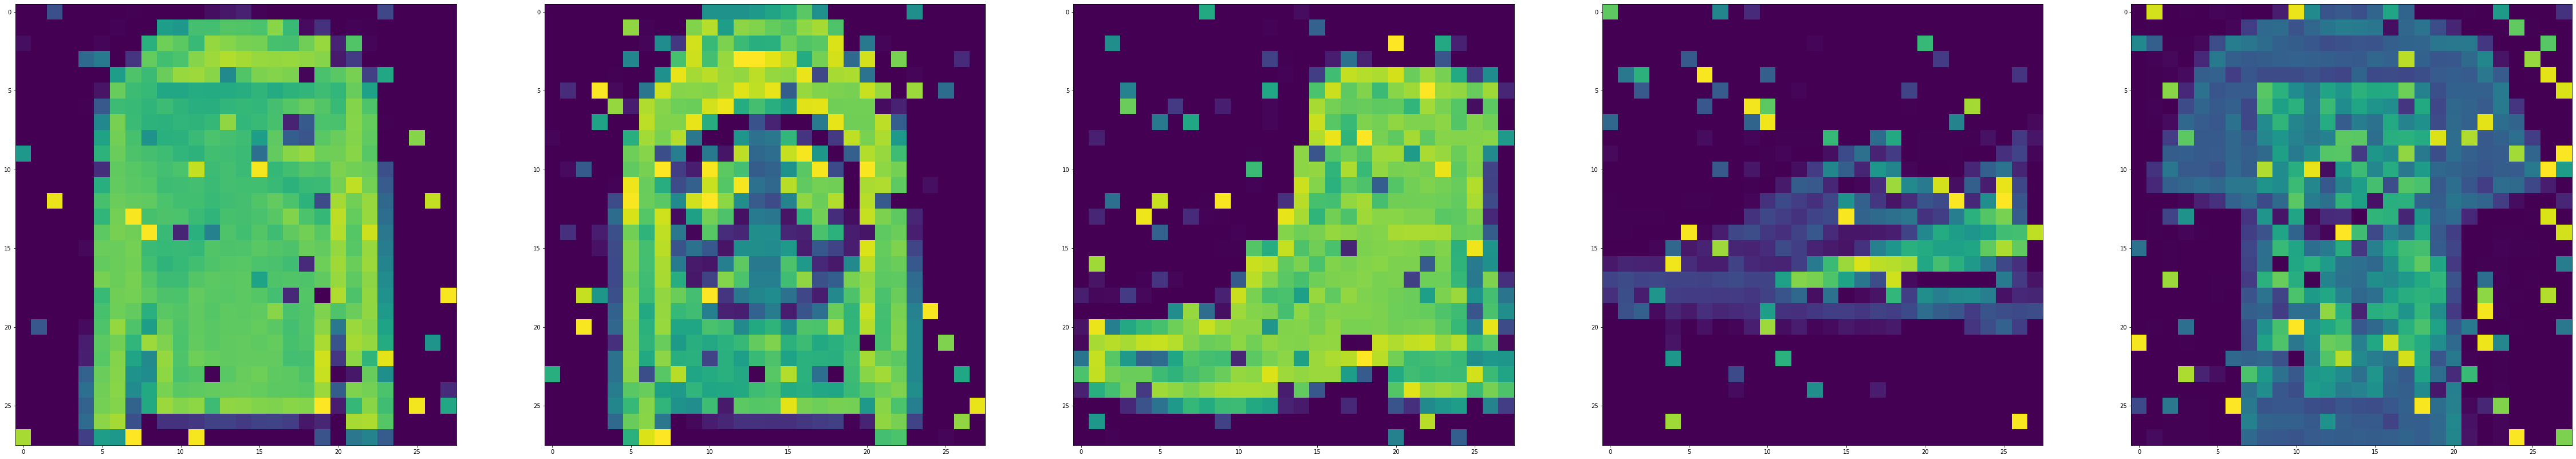

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
  ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

In [ ]:
# input layer
input_layer = Input(shape=(28, 28, 1))
# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view = MaxPool2D( (2, 2), padding='same')(encoded_layer3)
# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer = Conv2D(1, (3, 3), padding='same')(decoded_layer3)
# compile the model
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4624  

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=10, batch_size=2048, 
                      validation_data=(val_x_n, val_x), 
                      callbacks=[early_stopping])

Epoch 1/10
24/24 [==============================] - 211s 9s/step - loss: 0.0986 - val_loss: 0.0572
Epoch 2/10
24/24 [==============================] - 203s 8s/step - loss: 0.0469 - val_loss: 0.0385
Epoch 3/10
24/24 [==============================] - 206s 9s/step - loss: 0.0350 - val_loss: 0.0317
Epoch 4/10
24/24 [==============================] - 208s 9s/step - loss: 0.0296 - val_loss: 0.0275
Epoch 5/10
24/24 [==============================] - 206s 9s/step - loss: 0.0263 - val_loss: 0.0251
Epoch 6/10
24/24 [==============================] - 209s 9s/step - loss: 0.0244 - val_loss: 0.0235
Epoch 7/10
24/24 [==============================] - 208s 9s/step - loss: 0.0230 - val_loss: 0.0224
Epoch 8/10
24/24 [==============================] - 207s 9s/step - loss: 0.0220 - val_loss: 0.0217
Epoch 9/10
24/24 [==============================] - 206s 9s/step - loss: 0.0212 - val_loss: 0.0207
Epoch 10/10
24/24 [==============================] - 207s 9s/step - loss: 0.0205 - val_loss: 0.0201


1/1 [==============================] - 0s 232ms/step


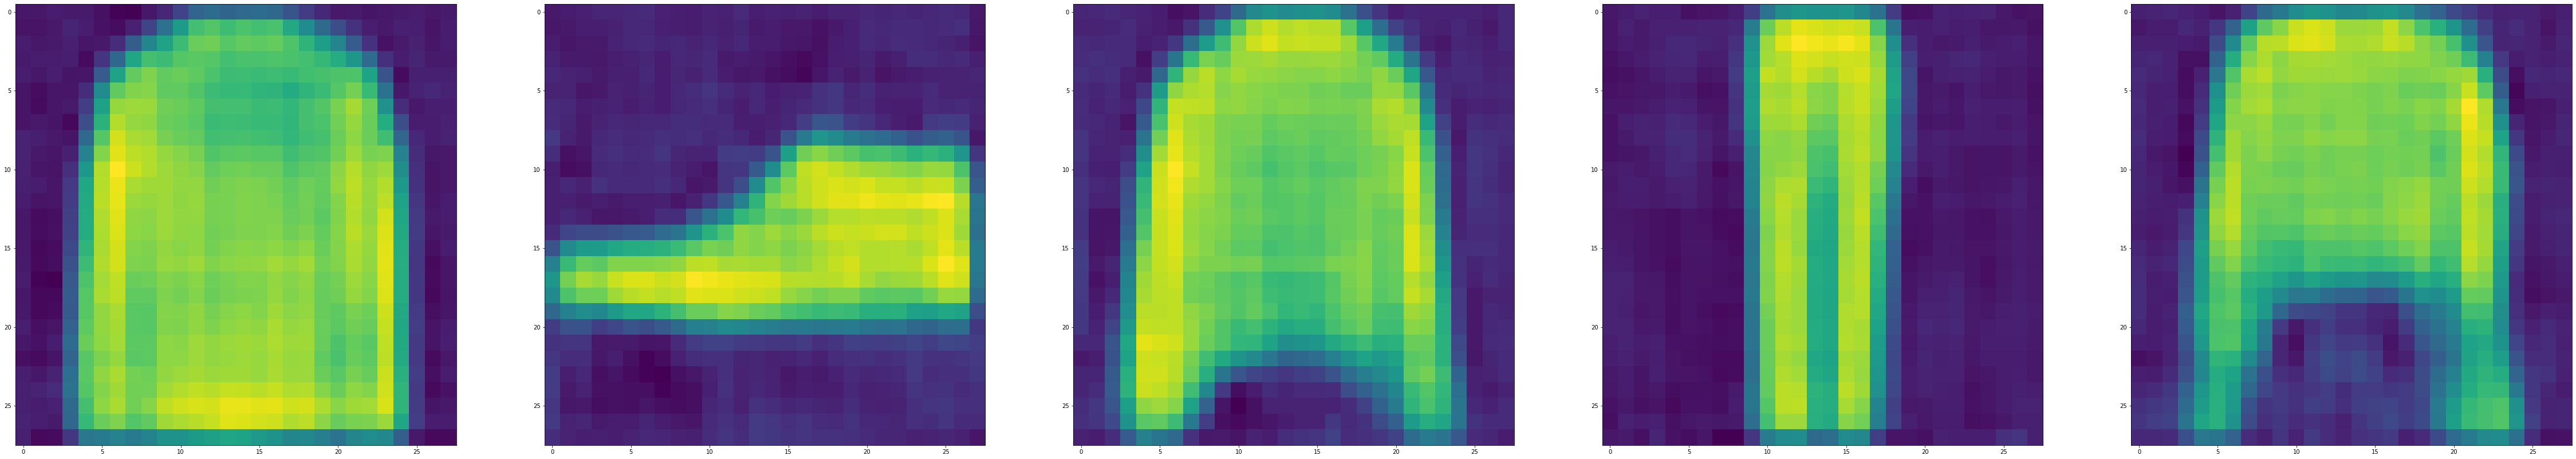

In [ ]:
preds = model_2.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
  ax[i-5].imshow(preds[i].reshape(28, 28))
plt.show()

**Task 2**

Model1_1

In [ ]:
## input layer
input_layer = Input(shape=(784,))
## encoding architecture
encode_layer1 = Dense(500, activation='relu')(input_layer)
encode_layer2 = Dense(250, activation='relu')(encode_layer1)
encode_layer3 = Dense(125, activation='relu')(encode_layer2)
## latent view
latent_view = Dense(10, activation='sigmoid')(encode_layer3)
## decoding architecture
decode_layer1 = Dense(125, activation='relu')(latent_view)
decode_layer2 = Dense(250, activation='relu')(decode_layer1)
decode_layer3 = Dense(500, activation='relu')(decode_layer2)
## output layer
output_layer = Dense(784)(decode_layer3)
model1_1 = Model(input_layer, output_layer)

In [ ]:
model1_1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_46 (Dense)            (None, 500)               392500    
                                                                 
 dense_47 (Dense)            (None, 250)               125250    
                                                                 
 dense_48 (Dense)            (None, 125)               31375     
                                                                 
 dense_49 (Dense)            (None, 10)                1260      
                                                                 
 dense_50 (Dense)            (None, 125)               1375      
                                                                 
 dense_51 (Dense)            (None, 250)               3150

In [ ]:
model1_1.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
hist = model1_1.fit(train_x, train_x, epochs=50, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/50
24/24 [==============================] - 1s 23ms/step - loss: 0.1099 - val_loss: 0.0761
Epoch 2/50
24/24 [==============================] - 0s 14ms/step - loss: 0.0698 - val_loss: 0.0629
Epoch 3/50
24/24 [==============================] - 0s 13ms/step - loss: 0.0547 - val_loss: 0.0486
Epoch 4/50
24/24 [==============================] - 0s 13ms/step - loss: 0.0440 - val_loss: 0.0404
Epoch 5/50
24/24 [==============================] - 0s 12ms/step - loss: 0.0386 - val_loss: 0.0366
Epoch 6/50
24/24 [==============================] - 0s 12ms/step - loss: 0.0357 - val_loss: 0.0332
Epoch 7/50
24/24 [==============================] - 0s 16ms/step - loss: 0.0312 - val_loss: 0.0301
Epoch 8/50
24/24 [==============================] - 0s 15ms/step - loss: 0.0283 - val_loss: 0.0270
Epoch 9/50
24/24 [==============================] - 0s 15ms/step - loss: 0.0264 - val_loss: 0.0256
Epoch 10/50
24/24 [==============================] - 0s 16ms/step - loss: 0.0253 - val_loss: 0.0249
Epoch 11/

In [ ]:
def plot(hist):
    #Visualize the models loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss']) 
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right') 
    
    plt.show()

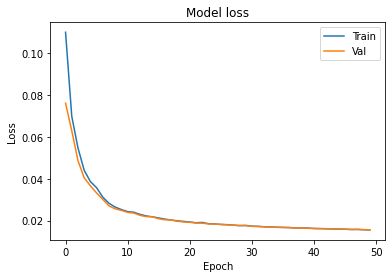

In [ ]:
plot(hist)

Input

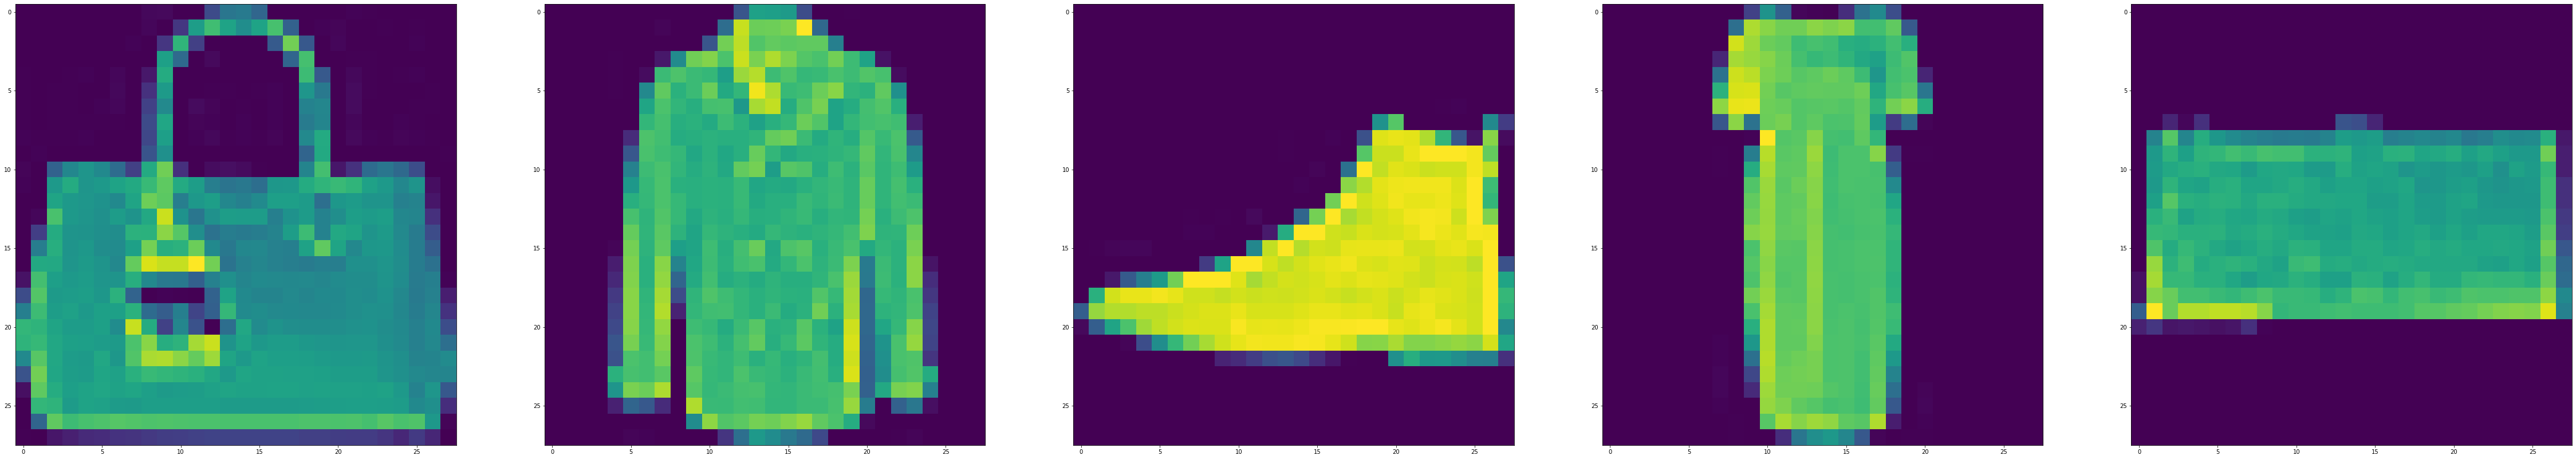

In [ ]:
from PIL import Image
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
  ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

Output

375/375 [==============================] - 1s 2ms/step


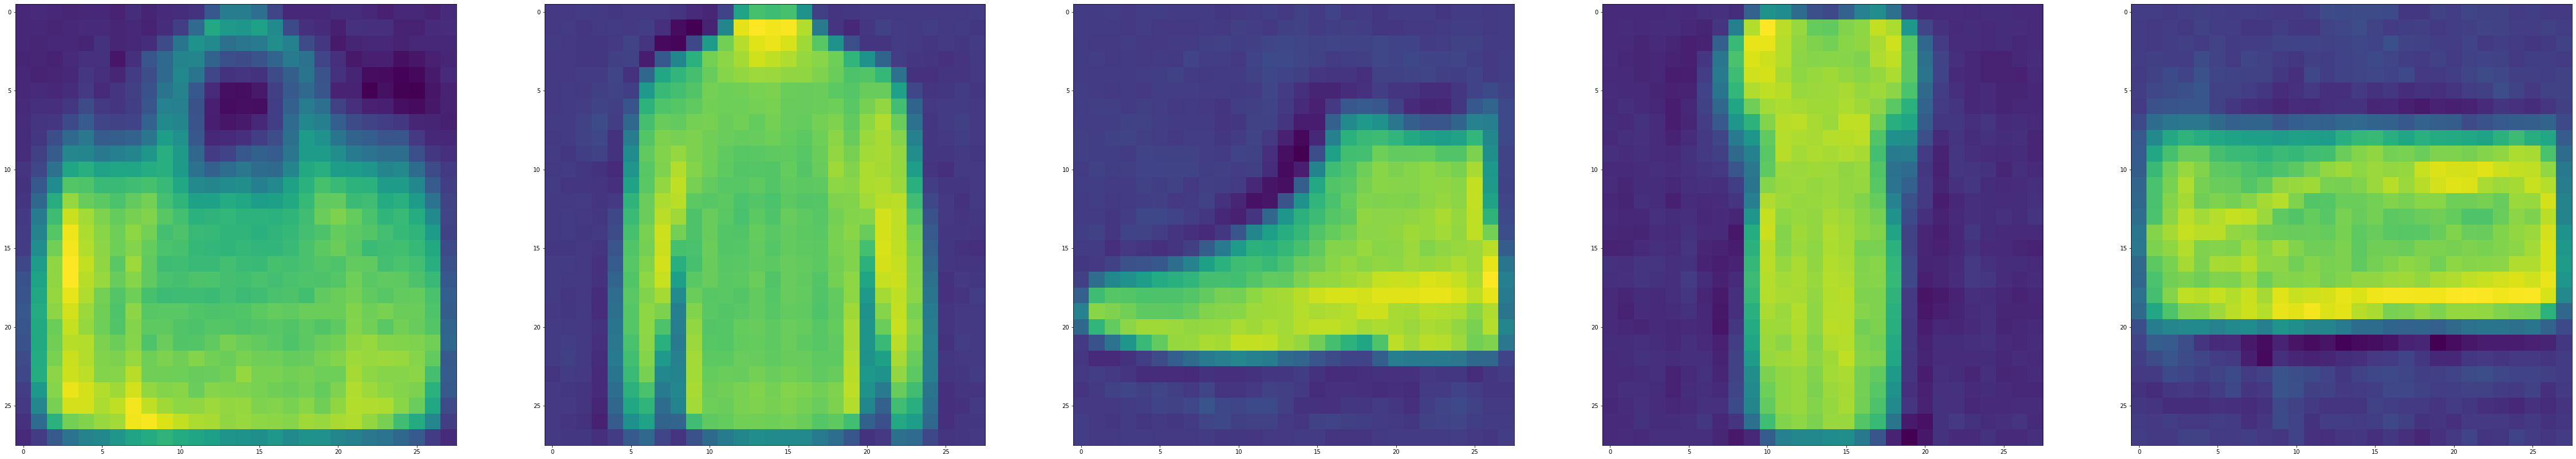

In [ ]:
preds = model1_1.predict(val_x)

f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
  ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

Model1_2

In [ ]:
## input layer
input_layer = Input(shape=(784,))
## encoding architecture
encode_layer1 = Dense(2000, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)
encode_layer4 = Dense(250, activation='relu')(encode_layer3)
## latent view
latent_view = Dense(10, activation='sigmoid')(encode_layer4)
## decoding architecture
decode_layer1 = Dense(250, activation='relu')(latent_view)
decode_layer2 = Dense(500, activation='relu')(decode_layer1)
decode_layer3 = Dense(1000, activation='relu')(decode_layer2)
decode_layer4 = Dense(2000, activation='relu')(decode_layer3)

## output layer
output_layer = Dense(784)(decode_layer4)
model1_2 = Model(input_layer, output_layer)

In [ ]:
model1_2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_54 (Dense)            (None, 2000)              1570000   
                                                                 
 dense_55 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_56 (Dense)            (None, 500)               500500    
                                                                 
 dense_57 (Dense)            (None, 250)               125250    
                                                                 
 dense_58 (Dense)            (None, 10)                2510      
                                                                 
 dense_59 (Dense)            (None, 250)               2750

In [ ]:
model1_2.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
hist = model1_2.fit(train_x, train_x, epochs=50, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/50
24/24 [==============================] - 2s 46ms/step - loss: 0.1032 - val_loss: 0.0747
Epoch 2/50
24/24 [==============================] - 1s 35ms/step - loss: 0.0672 - val_loss: 0.0602
Epoch 3/50
24/24 [==============================] - 1s 34ms/step - loss: 0.0554 - val_loss: 0.0493
Epoch 4/50
24/24 [==============================] - 1s 35ms/step - loss: 0.0472 - val_loss: 0.0414
Epoch 5/50
24/24 [==============================] - 1s 34ms/step - loss: 0.0394 - val_loss: 0.0377
Epoch 6/50
24/24 [==============================] - 1s 34ms/step - loss: 0.0361 - val_loss: 0.0343
Epoch 7/50
24/24 [==============================] - 1s 35ms/step - loss: 0.0332 - val_loss: 0.0324
Epoch 8/50
24/24 [==============================] - 1s 35ms/step - loss: 0.0310 - val_loss: 0.0292
Epoch 9/50
24/24 [==============================] - 1s 35ms/step - loss: 0.0284 - val_loss: 0.0272
Epoch 10/50
24/24 [==============================] - 1s 35ms/step - loss: 0.0270 - val_loss: 0.0258
Epoch 11/

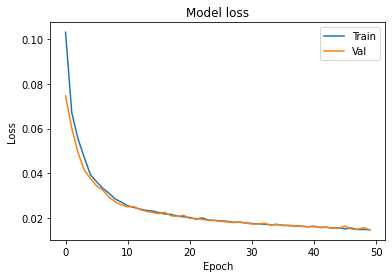

In [ ]:
plot(hist)

Input

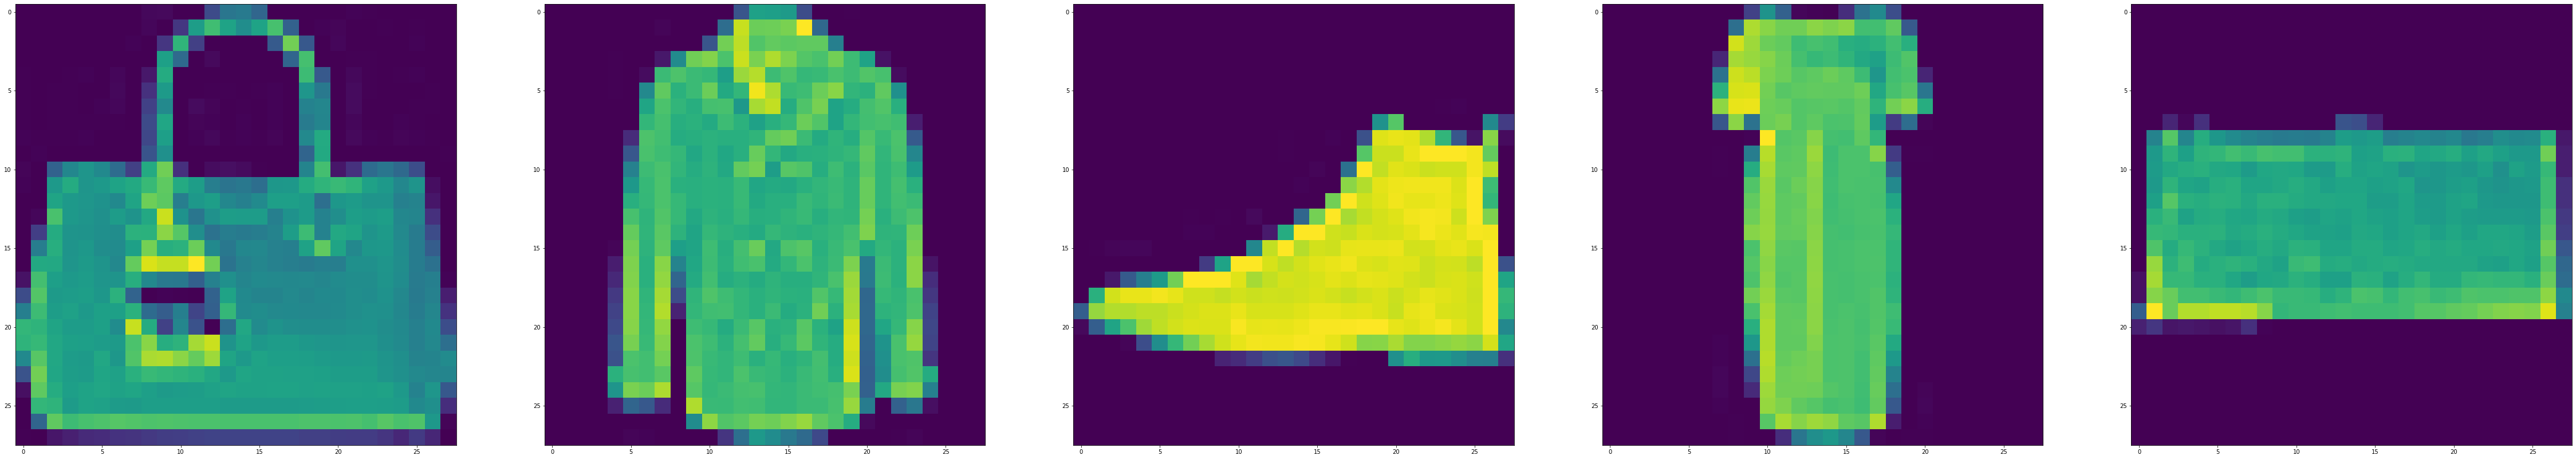

In [ ]:
from PIL import Image
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
  ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

Output

375/375 [==============================] - 1s 2ms/step


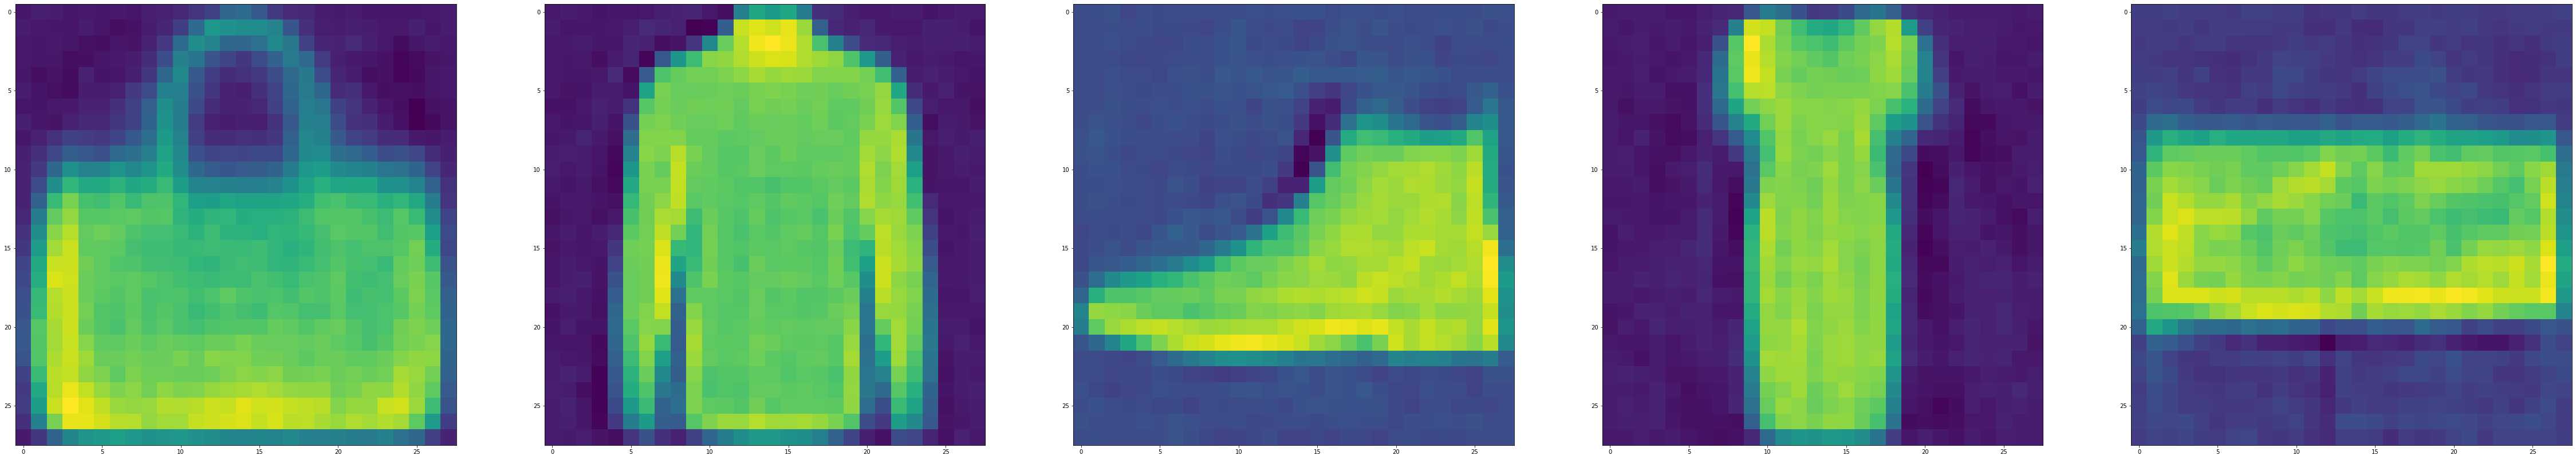

In [ ]:
preds = model1_2.predict(val_x)

f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
  ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

Model1_3

In [ ]:
## input layer
input_layer = Input(shape=(784,))
## encoding architecture
encode_layer1 = Dense(500, activation='relu')(input_layer)
encode_layer2 = Dense(250, activation='relu')(encode_layer1)
encode_layer3 = Dense(125, activation='relu')(encode_layer2)
encode_layer4 = Dense(50, activation='relu')(encode_layer3)
## latent view
latent_view = Dense(10, activation='sigmoid')(encode_layer3)
## decoding architecture
decode_layer1 = Dense(50, activation='relu')(latent_view)
decode_layer2 = Dense(125, activation='relu')(decode_layer1)
decode_layer3 = Dense(250, activation='relu')(decode_layer2)
decode_layer4 = Dense(500, activation='relu')(decode_layer3)
## output layer
output_layer = Dense(784)(decode_layer4)
model1_3 = Model(input_layer, output_layer)

In [ ]:
model1_3.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_64 (Dense)            (None, 500)               392500    
                                                                 
 dense_65 (Dense)            (None, 250)               125250    
                                                                 
 dense_66 (Dense)            (None, 125)               31375     
                                                                 
 dense_68 (Dense)            (None, 10)                1260      
                                                                 
 dense_69 (Dense)            (None, 50)                550       
                                                                 
 dense_70 (Dense)            (None, 125)               6375

In [ ]:
model1_3.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
hist = model1_3.fit(train_x, train_x, epochs=50, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/50
24/24 [==============================] - 1s 25ms/step - loss: 0.1065 - val_loss: 0.0756
Epoch 2/50
24/24 [==============================] - 0s 13ms/step - loss: 0.0718 - val_loss: 0.0678
Epoch 3/50
24/24 [==============================] - 0s 12ms/step - loss: 0.0593 - val_loss: 0.0524
Epoch 4/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0474 - val_loss: 0.0427
Epoch 5/50
24/24 [==============================] - 0s 12ms/step - loss: 0.0405 - val_loss: 0.0382
Epoch 6/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0369 - val_loss: 0.0350
Epoch 7/50
24/24 [==============================] - 0s 12ms/step - loss: 0.0333 - val_loss: 0.0317
Epoch 8/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0310 - val_loss: 0.0295
Epoch 9/50
24/24 [==============================] - 0s 13ms/step - loss: 0.0281 - val_loss: 0.0282
Epoch 10/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0268 - val_loss: 0.0256
Epoch 11/

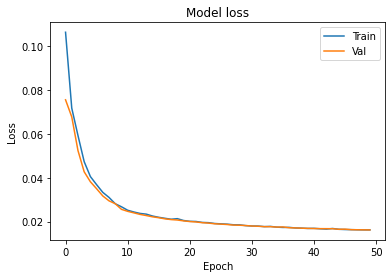

In [ ]:
plot(hist)

Input

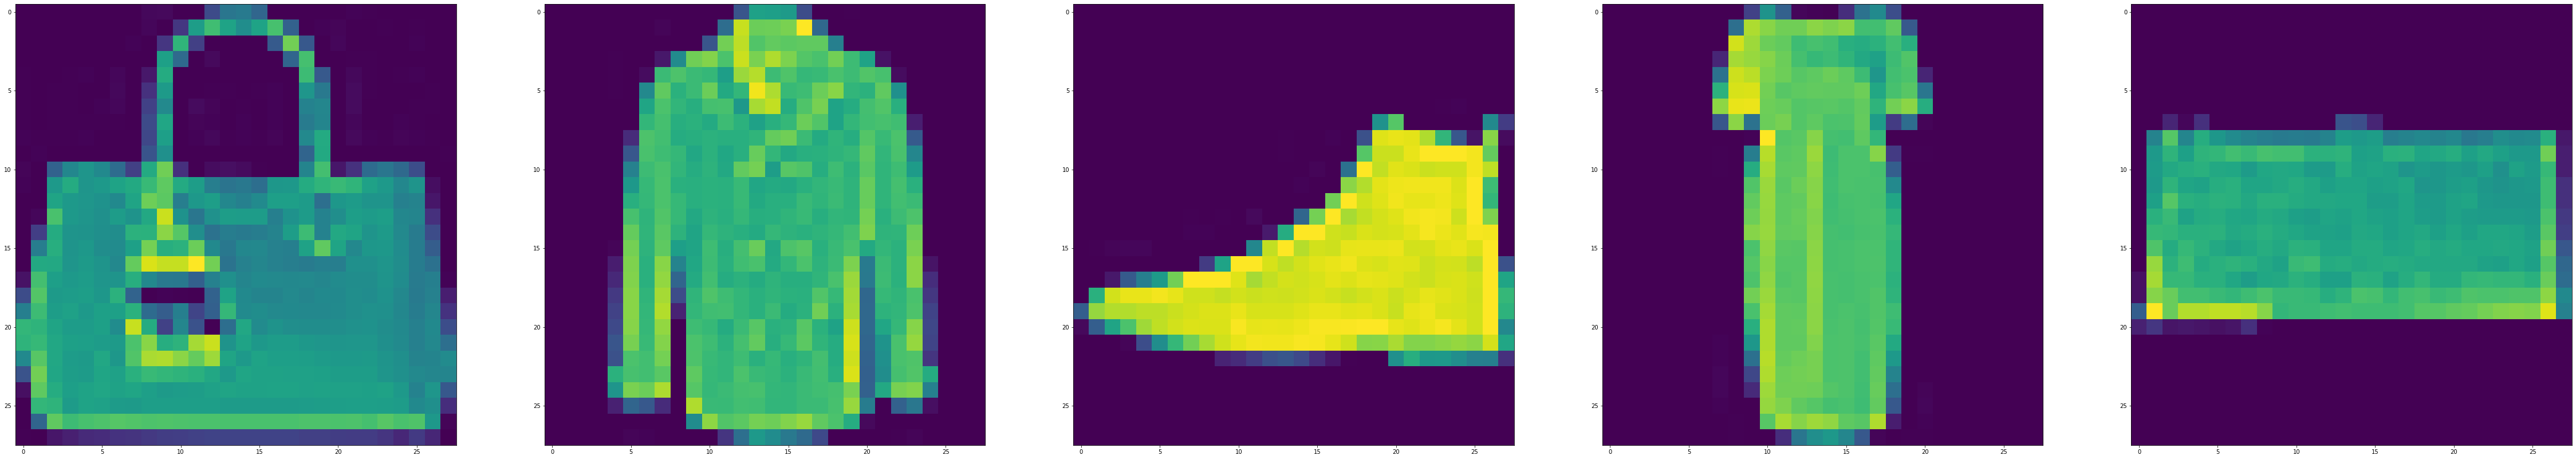

In [ ]:
from PIL import Image
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
  ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

Output

375/375 [==============================] - 1s 2ms/step


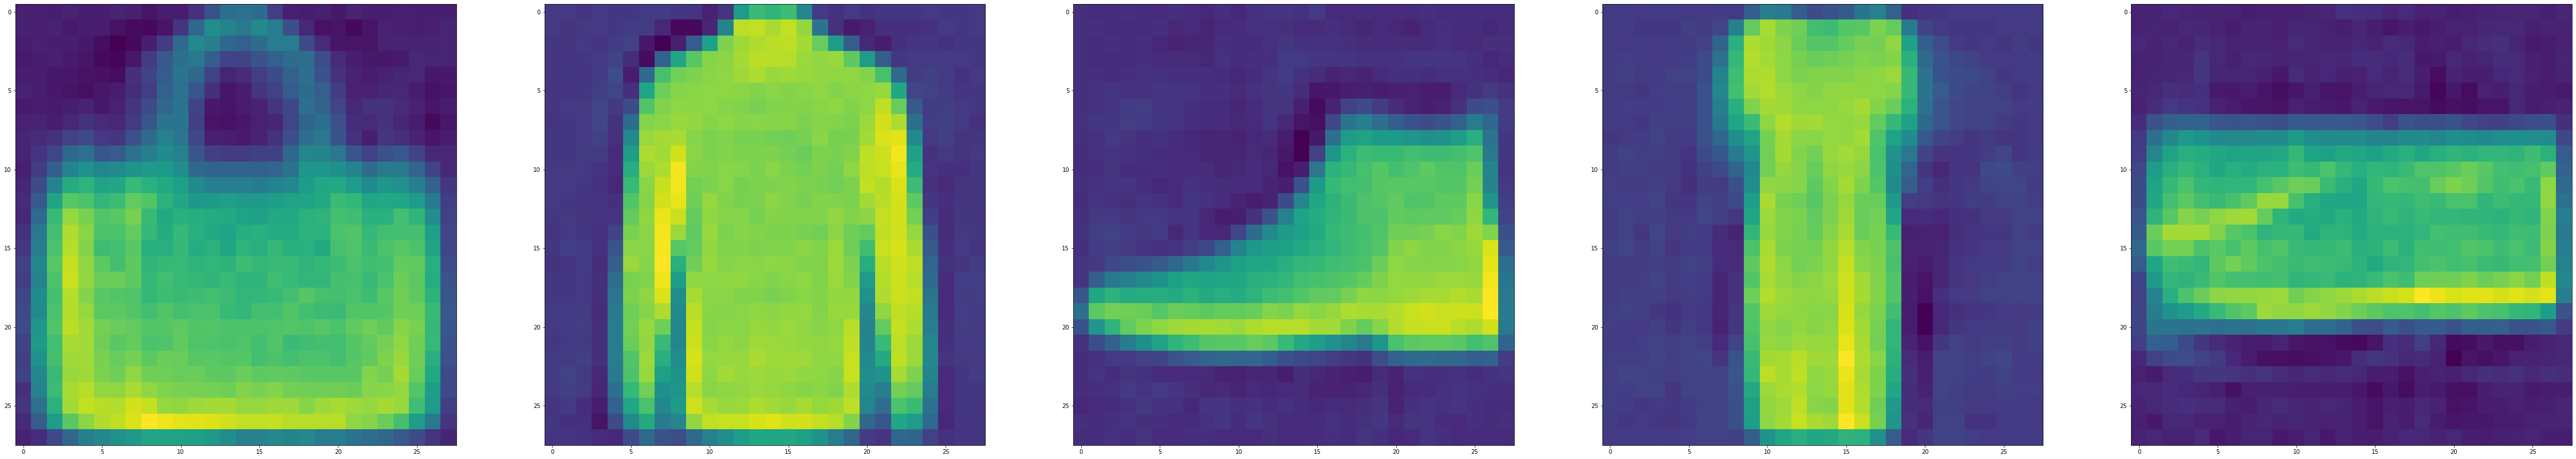

In [ ]:
preds = model1_3.predict(val_x)

f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
  ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

**Task 3**

Model2_1

In [ ]:
# input layer
input_layer2_1 = Input(shape=(28, 28, 1))
# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer2_1)
encoded_layer1 = BatchNormalization()(encoded_layer1)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = BatchNormalization()(encoded_layer2)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
encoded_layer3 = BatchNormalization()(encoded_layer3)
latent_view2_1 = MaxPool2D( (2, 2), padding='same')(encoded_layer3)
# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view2_1)
decoded_layer1 = BatchNormalization()(decoded_layer1)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = BatchNormalization()(decoded_layer2)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = BatchNormalization()(decoded_layer3)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer2_1 = Conv2D(1, (3, 3), padding='same')(decoded_layer3)
# compile the model
model2_1 = Model(input_layer2_1, output_layer2_1)
model2_1.compile(optimizer='adam', loss='mse')

In [ ]:
model2_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 32)       128   

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model2_1.fit(train_x_n, train_x, epochs=25, batch_size=64, 
                      validation_data=(val_x_n, val_x), 
                      callbacks=[early_stopping])

Epoch 1/25
750/750 [==============================] - 14s 8ms/step - loss: 0.0447 - val_loss: 0.0255
Epoch 2/25
750/750 [==============================] - 5s 7ms/step - loss: 0.0216 - val_loss: 0.0203
Epoch 3/25
750/750 [==============================] - 5s 7ms/step - loss: 0.0187 - val_loss: 0.0174
Epoch 4/25
750/750 [==============================] - 8s 11ms/step - loss: 0.0170 - val_loss: 0.0164
Epoch 5/25
750/750 [==============================] - 10s 13ms/step - loss: 0.0155 - val_loss: 0.0165
Epoch 6/25
750/750 [==============================] - 6s 8ms/step - loss: 0.0144 - val_loss: 0.0132
Epoch 7/25
750/750 [==============================] - 6s 8ms/step - loss: 0.0135 - val_loss: 0.0124
Epoch 8/25
750/750 [==============================] - 6s 8ms/step - loss: 0.0130 - val_loss: 0.0121
Epoch 9/25
750/750 [==============================] - 5s 7ms/step - loss: 0.0123 - val_loss: 0.0114
Epoch 10/25
750/750 [==============================] - 5s 7ms/step - loss: 0.0118 - val_loss: 0.

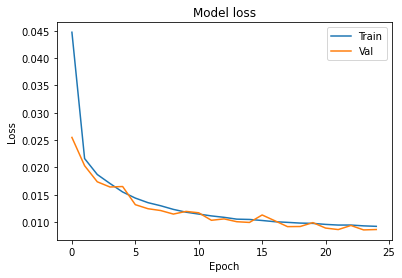

In [ ]:
plot(history)

In [ ]:
def plot_img(model, input_layer, latent_view):
    
    pred = model.predict(train_x_n)

    encoder_model = Model(input_layer, latent_view)

    encoder_model_pred = encoder_model.predict(train_x_n)
    
    plt.figure(figsize=(80, 10))
    
    for i in range(5):
        #original
        ax= plt.subplot(3, 20, i+1)
        plt.imshow(train_x_n[i].reshape(28, 28))
        # plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        #features
        lent = len(encoder_model_pred[i])
        ax= plt.subplot(3, 20, i+1+20)
        plt.imshow(encoder_model_pred[i].reshape(lent,-1))
        # plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        #constructed
        ax= plt.subplot(3, 20, i+1+2*20)
        plt.imshow(pred[i].reshape(28, 28))
        # plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

1500/1500 [==============================] - 2s 2ms/step


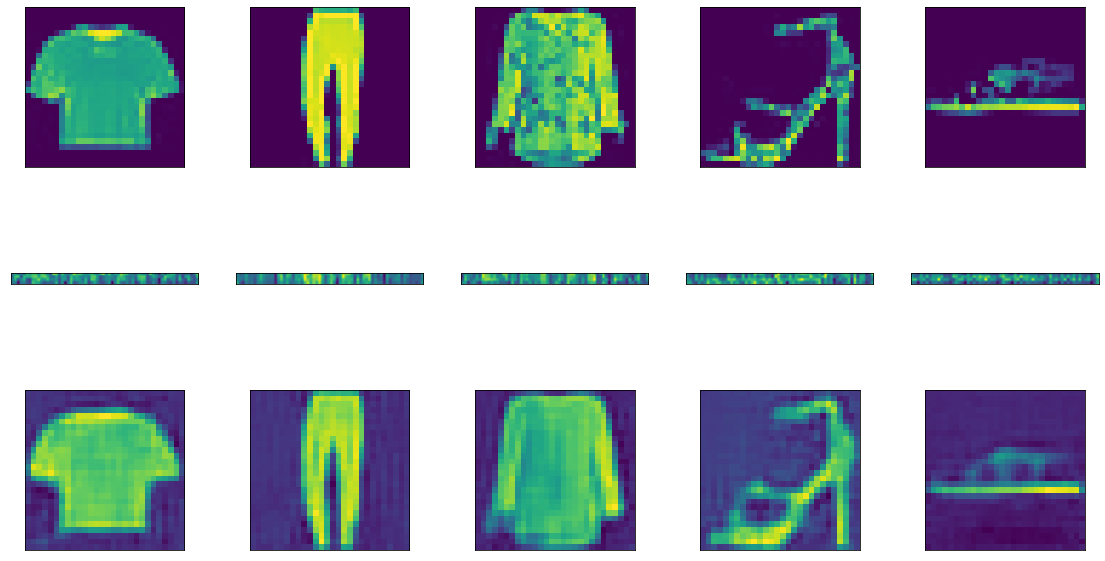

In [ ]:
plot_img(model2_1, input_layer, latent_view)

Model2_2

In [ ]:
# input layer
input_layer = Input(shape=(28, 28, 1))
# encoding architecture
encoded_layer1 = Conv2D(128, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer2)
encoded_layer3 = MaxPool2D( (2, 2), padding='same')(encoded_layer3)
encoded_layer4 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer3)

latent_view = MaxPool2D( (2, 2), padding='same')(encoded_layer4)

# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu', padding='same')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
decoded_layer4 = Conv2D(128, (3, 3), activation='relu')(decoded_layer3)
decoded_layer4 = UpSampling2D((2, 2))(decoded_layer4)
output_layer = Conv2D(1, (3, 3), padding='same')(decoded_layer4)
# compile the model
model2_2 = Model(input_layer, output_layer)
model2_2.compile(optimizer='adam', loss='mse')

In [ ]:
model2_2.summary()

Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_100 (Conv2D)         (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_102 (Conv2D)         (None, 7, 7, 32)          184

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model2_2.fit(train_x_n, train_x, epochs=25, batch_size=64, 
                      validation_data=(val_x_n, val_x), 
                      callbacks=[early_stopping])

Epoch 1/25
750/750 [==============================] - 9s 11ms/step - loss: 0.0279 - val_loss: 0.0195
Epoch 2/25
750/750 [==============================] - 8s 11ms/step - loss: 0.0178 - val_loss: 0.0170
Epoch 3/25
750/750 [==============================] - 8s 11ms/step - loss: 0.0160 - val_loss: 0.0157
Epoch 4/25
750/750 [==============================] - 8s 11ms/step - loss: 0.0148 - val_loss: 0.0143
Epoch 5/25
750/750 [==============================] - 9s 11ms/step - loss: 0.0140 - val_loss: 0.0136
Epoch 6/25
750/750 [==============================] - 8s 11ms/step - loss: 0.0135 - val_loss: 0.0132
Epoch 7/25
750/750 [==============================] - 8s 11ms/step - loss: 0.0131 - val_loss: 0.0131
Epoch 8/25
750/750 [==============================] - 9s 12ms/step - loss: 0.0126 - val_loss: 0.0126
Epoch 9/25
750/750 [==============================] - 8s 11ms/step - loss: 0.0124 - val_loss: 0.0121
Epoch 10/25
750/750 [==============================] - 8s 11ms/step - loss: 0.0121 - val_lo

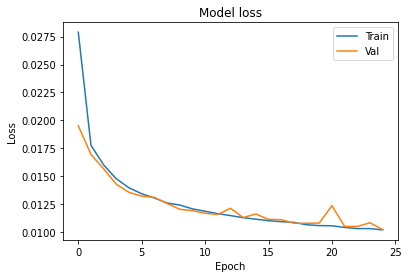

In [ ]:
plot(history)

1500/1500 [==============================] - 2s 2ms/step


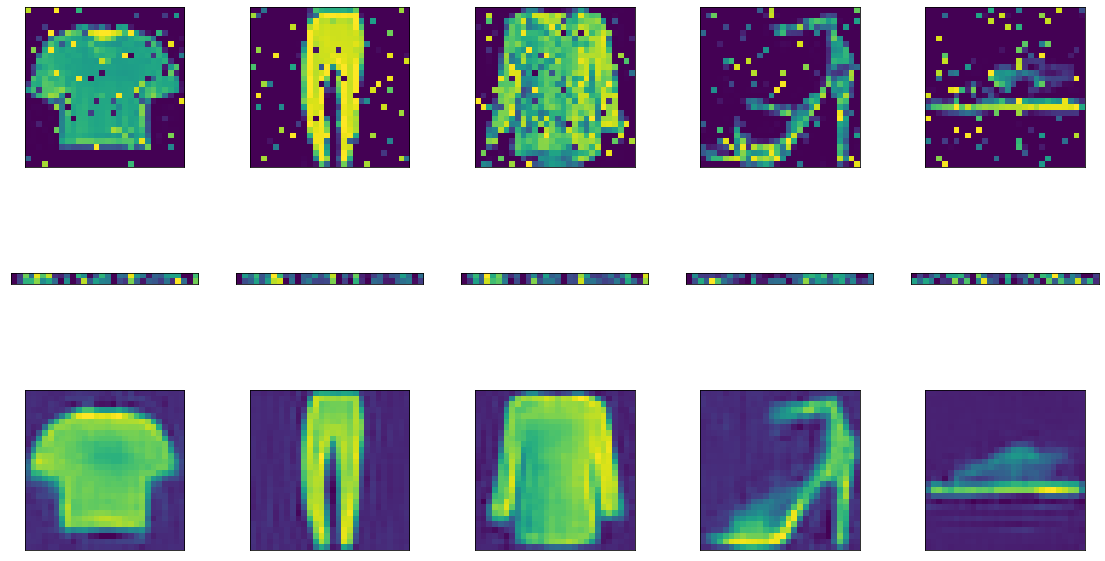

In [ ]:
plot_img(model2_2, input_layer, latent_view)

**Task 5**

CoarseSaltAndPepper Noise

In [ ]:
# Lets add sample noise - Salt and Pepper
noise = augmenters.CoarseSaltAndPepper(0.05, size_percent=(0.01, 0.1))
seq_object = augmenters.Sequential([noise])
train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

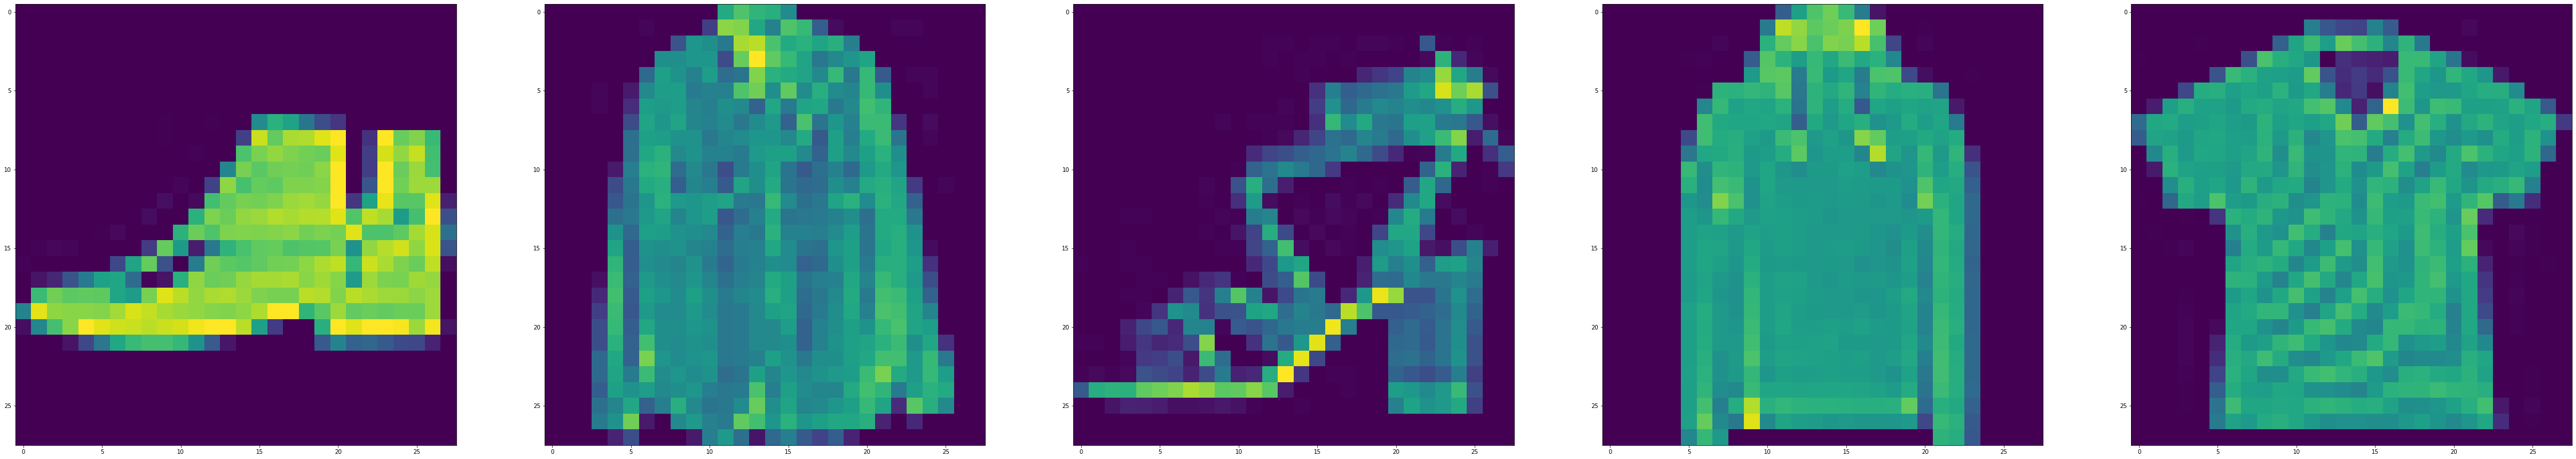

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
  ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

1500/1500 [==============================] - 3s 2ms/step


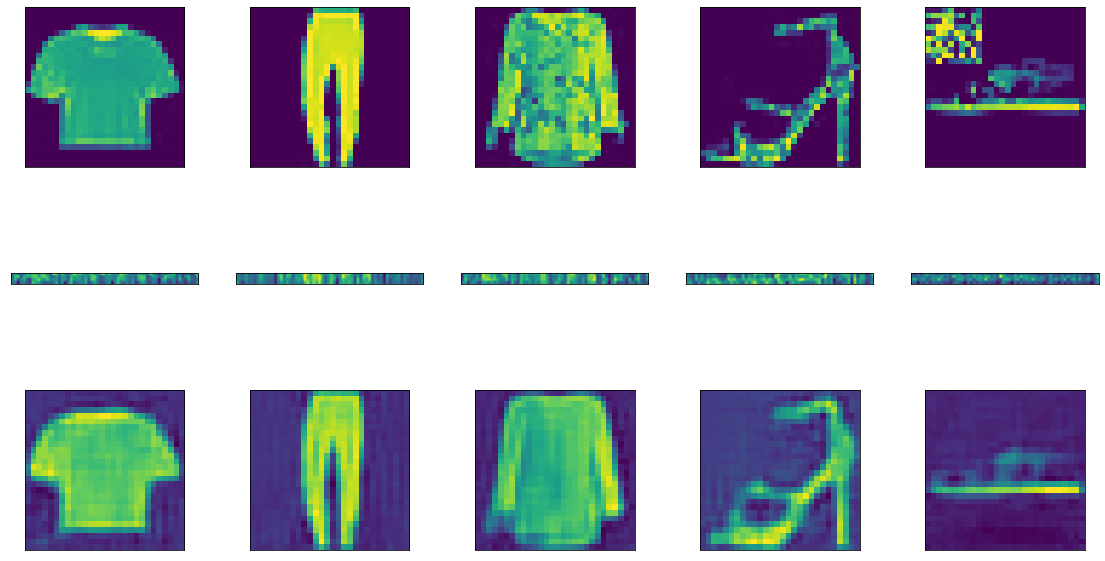

In [ ]:
plot_img(model2_1, input_layer, latent_view)

In [ ]:
# Lets add sample noise - Salt and Pepper
noise = augmenters.ImpulseNoise(p=(0.0, 0.03))
seq_object = augmenters.Sequential([noise])
train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

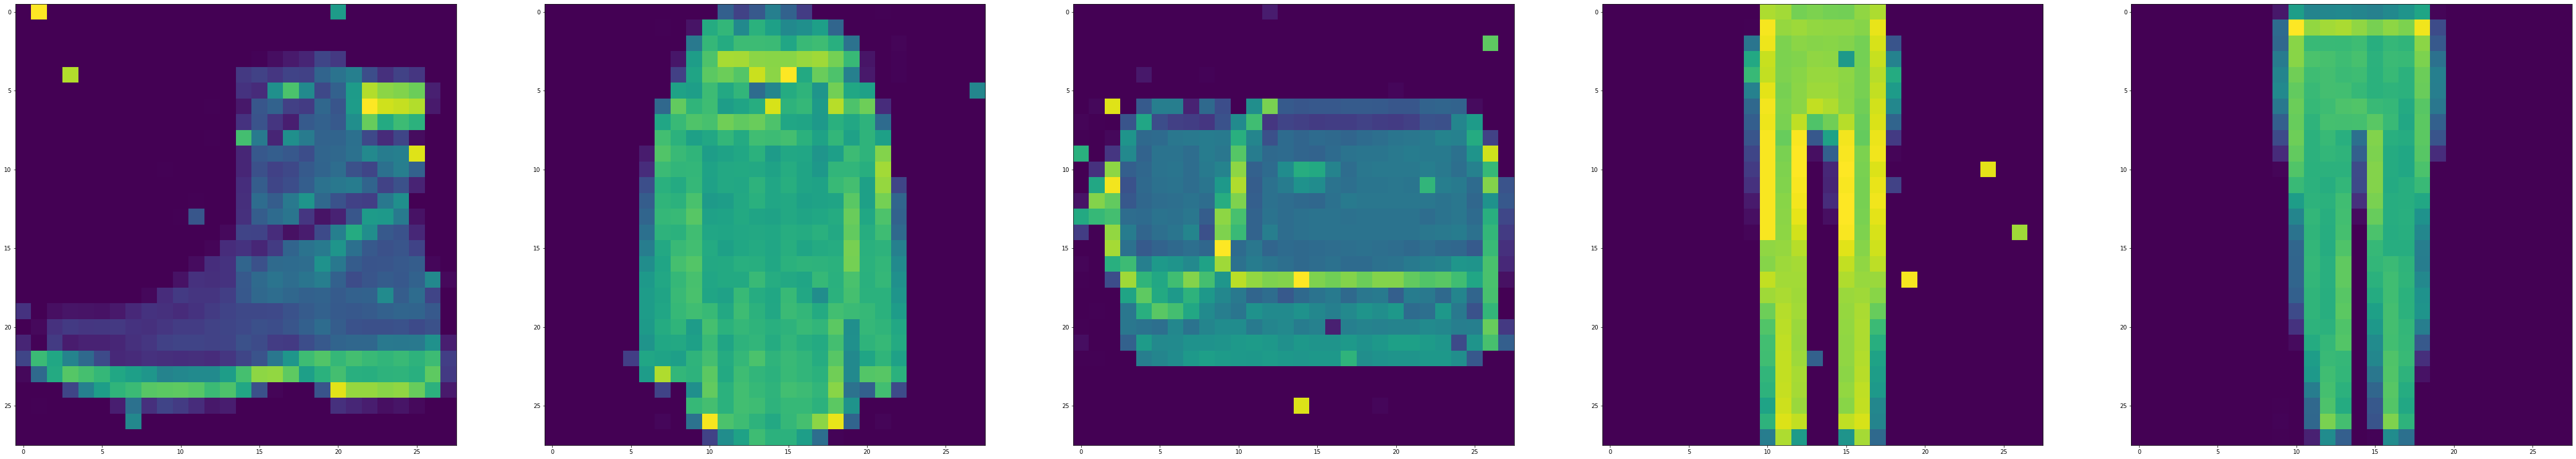

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
  ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

1500/1500 [==============================] - 2s 2ms/step


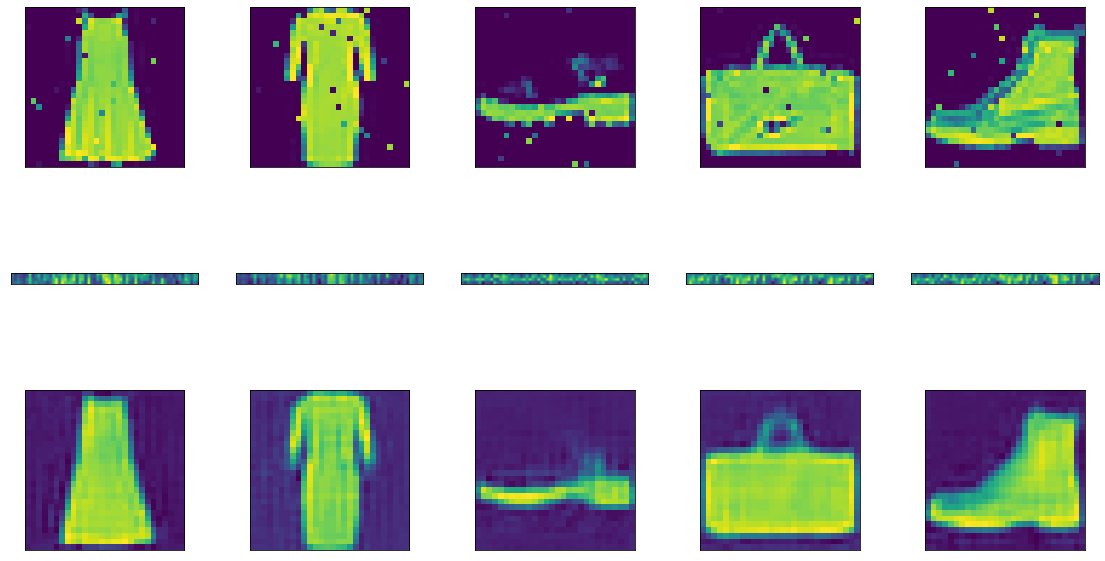

In [ ]:
plot_img(model2_1, input_layer2_1, latent_view2_1)